<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Module 4: Weight initialisation, learning rate and cost function

In this notebook, we'll see examples related to the initialisation of the network weights, the choice of the learning rate and the cost function.

In order to do that, we'll first impport the required libraries and define some artificial data:

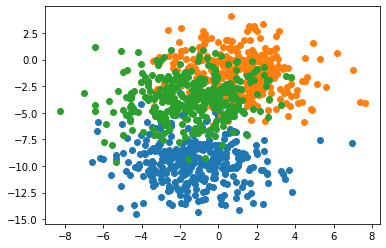

In [ ]:
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# scatter plot for each class value
for class_value in range(3):
	# select indices of points with the class label
	row_ix = where(y == class_value)
	# scatter plot for points with a different color
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
pyplot.show()

Now, we need to convert the labels to one-hot and then split it in training and testing:

In [ ]:
# one hot encode output variable
y = to_categorical(y)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

## Weight initialisation


Let's check how the same network behaves with different weight initialisation.

### he_uniform

Train: 0.808, Test: 0.838


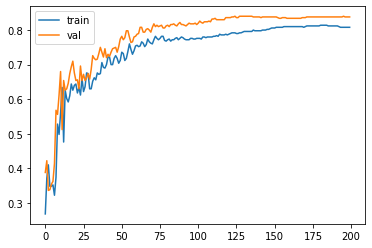

In [ ]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=len(trainX))

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

### glorot_uniform

Train: 0.816, Test: 0.836


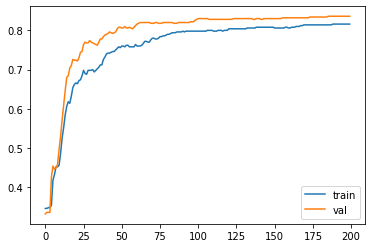

In [ ]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=len(trainX))

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

### zeros

Train: 0.342, Test: 0.326


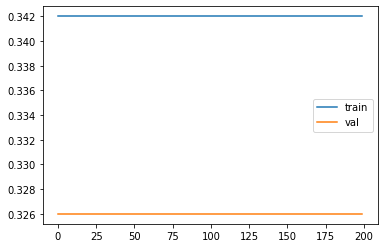

In [ ]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='zeros'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=len(trainX))

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

### ones

Train: 0.472, Test: 0.500


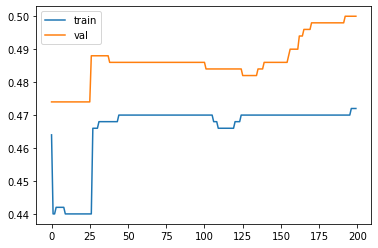

In [ ]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='ones'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=len(trainX))

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

Look at the difference in results when using different weight initialisations. This is something some times left behind and not given the due importance, but weight initialisation can mean the model converge.

Nowadays, there are a few methods we can use that almost always give good results, such as *he_uniform* o *glorot_uniform*, since they draw the values for the weight initialisation from data distribution that allow for a good training process.

## Different *learning rates*

We'll now try different values for the learning rate, one of the most important parameters when training a neural network. It drives the training by specifying the magnitude of the updates to the weights at each iteration.

In this notebook, we'll try with typical values for the learning rate, such as 0.5, 0.01 and 0.0001, and we'll see the differences.

Appart from these typical values, there are more complex ways of specifying the learning rate, such as learning rate schedulers. In their essence, this techniques just adapt the learning rate during the training process following some function. For more information, you can refer to resources such as [this one](https://d2l.ai/chapter_optimization/lr-scheduler.html).

### lr=0.5

Train: 0.596, Test: 0.582


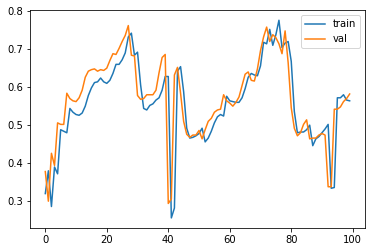

In [ ]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.5, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0, batch_size=len(trainX))

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

### lr=0.01

Train: 0.786, Test: 0.814


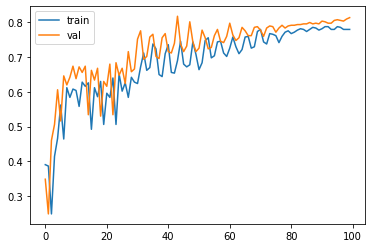

In [ ]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0, batch_size=len(trainX))

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

### lr=0.0001

Train: 0.452, Test: 0.462


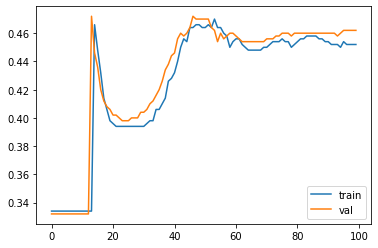

In [ ]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.0001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0, batch_size=len(trainX))

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

Note how it is important to find a suitable learning rate to the model and data at hand: too high, it can make the network unstable to the point that it takes longer to converge or even never converge. Too low, it can make the network take forever to get to a good local minimum (converge), or even get trapped in a local minimum that's not good enough to solve the problem at hand.

# Cost (loss) functions

The cost (or loss) function is a very important part of our model. It will tell the model if it's mistaken, and more importantly, by how much.

There are normally some rules of thumb that we can apply. For example, in classification problems we'll almost always see the cross-entropy applied. And for regression problems, the mean squared error (MSE) or the mean absolute error (MAE). But there are more complex cases in which we might want to even combine some of them.

So far, we have been working with the `categorical_crossentropy` and categorical labels (i.e. one-hot encoded). In this last chapter, we'll change to numerical labels and try to solve the problem from a regression point of view by using the MSE and the MAE.

Pay attention to the changes we'll do to achieve that:

- We'll change the output of the network to just 1 neuron, because it will be outputing a continuous numerical value now
- The previous point also makes us change the activation function: we can no longer use the softmax, because it will squeeze the values between 0 and 1. We now need to leave the neuron without any activation, that is, use the linear activation.
- We'll convert the labels back to numerical, because now the cost function will compute the difference between two real values
- We'll change the cost function to MSE and MAE.
- We can no longer compute the accuracy, at least directly, since we'll only have some measure of the error. We could, however (and in this particular example), round the output values of the network to the nearest integer, convert both the labels and the rounded output to one-hot, and compute the accuracy. Nevertheless, this is not a good practice, and it should never be used unless there is a good reason for it. If we want to classify, we are far better off with the cost functions targeted for it: the cross-entropy.


Let's see how it works:

### Mean Squared Error

In [ ]:
# convert the labels to integer
import numpy as np
trainy_int = np.argmax(trainy, axis=1)
testy_int = np.argmax(testy, axis=1)

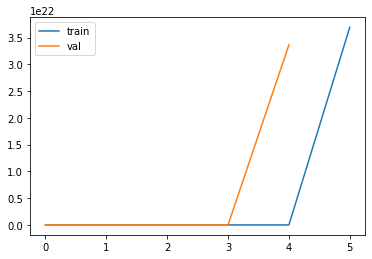

In [ ]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)

# fit model
history = model.fit(trainX, trainy_int, validation_data=(testX, testy_int), epochs=100, verbose=0, batch_size=len(trainX))

# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

Note how with this configuration the network didn't converge! This is something important: when you use different cost functions, you might see how this happens. Something that normally works for MSE is to change the optimiser to the RMSprop, which works better for this particular case:

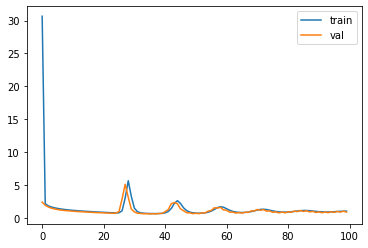

In [ ]:
from keras.optimizers import RMSprop
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
opt = RMSprop(lr=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)

# fit model
history = model.fit(trainX, trainy_int, validation_data=(testX, testy_int), epochs=100, verbose=0, batch_size=len(trainX))

# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

### Mean Absolute Error

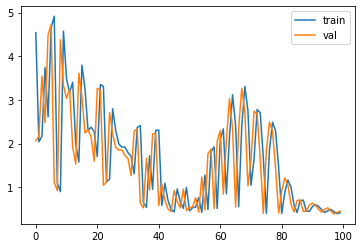

In [ ]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_absolute_error', optimizer=opt)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0, batch_size=len(trainX))

# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

As you can see, in this case we only get the error made by the networks, but no information on the accuracy. This cost functions are better used for regression problems, remember it!